In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [6]:
price_data=np.array([23, 30 ,20, 27, 44, 26 ,35, 20 ,29, 29,
25, 15, 18, 27, 19, 22, 12, 26 ,34, 15,
27 ,35, 26, 43, 35, 14, 24, 12, 23, 31,
40, 35, 38, 57 ,22, 42, 24, 21, 27, 33])
price_data

array([23, 30, 20, 27, 44, 26, 35, 20, 29, 29, 25, 15, 18, 27, 19, 22, 12,
       26, 34, 15, 27, 35, 26, 43, 35, 14, 24, 12, 23, 31, 40, 35, 38, 57,
       22, 42, 24, 21, 27, 33])

In [7]:
mean=np.mean(price_data)
med=np.median(price_data)
mode=stats.mode(price_data)

print(mean)
print(med)
print(mode)

27.625
26.5
ModeResult(mode=27, count=4)


In [8]:
price_range=max(price_data)-min(price_data)
print(price_range)

45


In [9]:
variance=np.var(price_data)
print(variance)

90.284375


In [10]:
std=np.std(price_data)
std

9.501809038283184

In [11]:
n=np.size(price_data)
n

40

In [12]:
skewness = stats.skew(price_data)
skewness

0.695211638721276

In [13]:
within_two_std = np.sum((price_data >= mean - 2 * std) & (price_data <= mean + 2 * std))
total_values = len(price_data)
chebyshev_bound = 1 - 1 / 2**2 * 100

within_two_std, total_values, chebyshev_bound

(39, 40, -24.0)

In [14]:
q1, q3 = np.percentile(price_data, [25, 75])
iqr = q3 - q1
q1, q3, iqr

(21.75, 34.25, 12.5)

In [15]:
outliers = price_data[(price_data < q1 - 1.5 * iqr) | (price_data > q3 + 1.5 * iqr)]
outliers

array([57])

Text(0.5, 1.0, 'Box plot of prices of branded shirts(in dollars)')

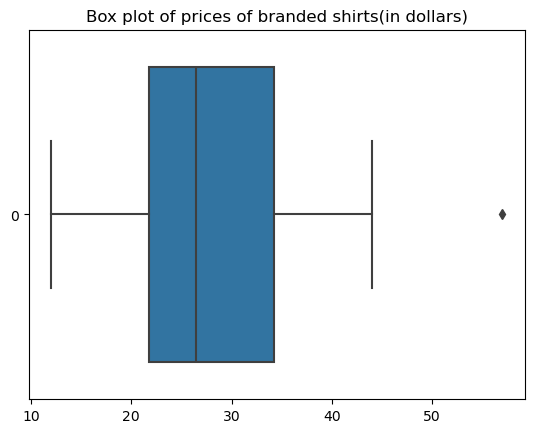

In [16]:
sns.boxplot(price_data,orient='h')
plt.title('Box plot of prices of branded shirts(in dollars)')

In [17]:
percentile_rank = stats.percentileofscore(price_data, 25)
percentile_rank

42.5

In [18]:
price_above_25=price_data[price_data>25]
prob=np.size(price_above_25)/np.size(price_data)
prob

0.575

In [19]:
price_count=np.unique(price_data)
print(price_count)

[12 14 15 18 19 20 21 22 23 24 25 26 27 29 30 31 33 34 35 38 40 42 43 44
 57]


([<matplotlib.axis.XTick at 0x14f9a1e10>,
 [Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(57, 0, '57')])

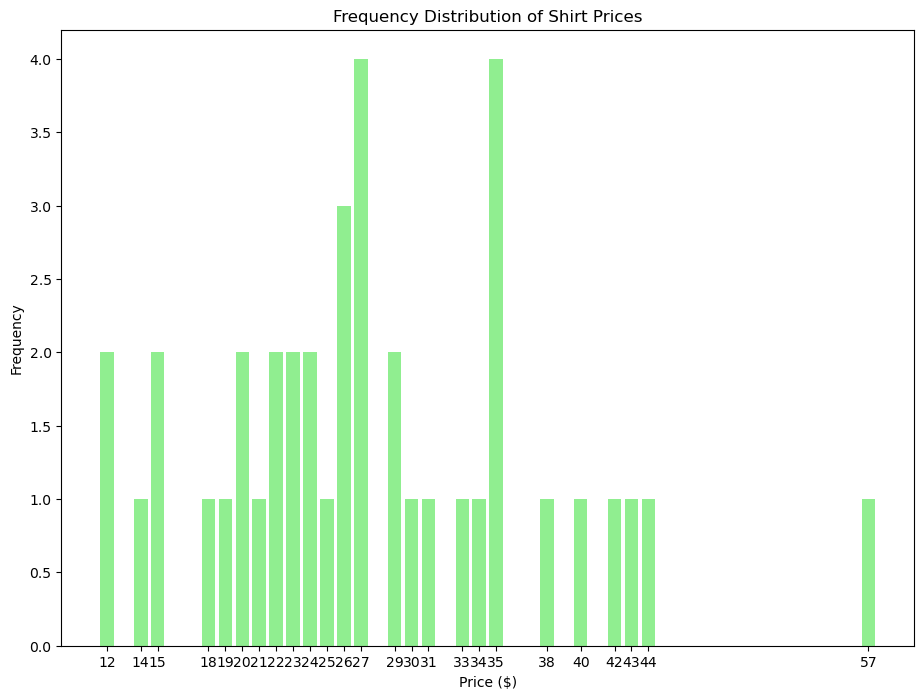

In [20]:
unique_prices, counts = np.unique(price_data, return_counts=True)

# Plotting histogram
plt.figure(figsize=(11,8))
plt.bar(unique_prices, counts, color='lightgreen')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Shirt Prices')
plt.xticks(unique_prices)

Text(0.5, 1.0, 'Probability Distribution of Shirt Prices')

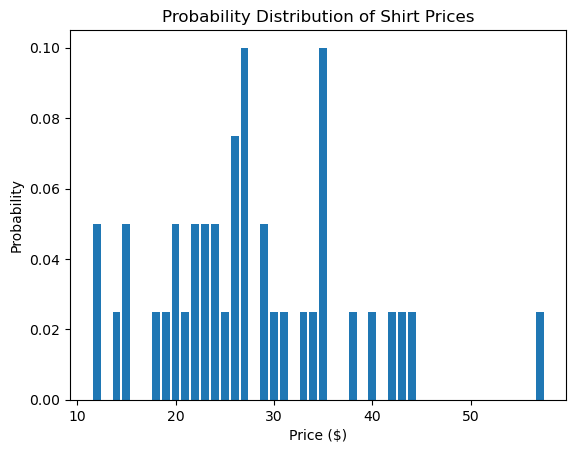

In [21]:
unique_prices, counts = np.unique(price_data, return_counts=True)
total_obs = np.size(price_data)
prob_distribution = counts / total_obs

# Plotting
plt.bar(unique_prices, prob_distribution)
plt.xlabel('Price ($)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Shirt Prices')

Text(0.5, 1.0, 'Histogram and Frequency Curve of Shirt Prices')

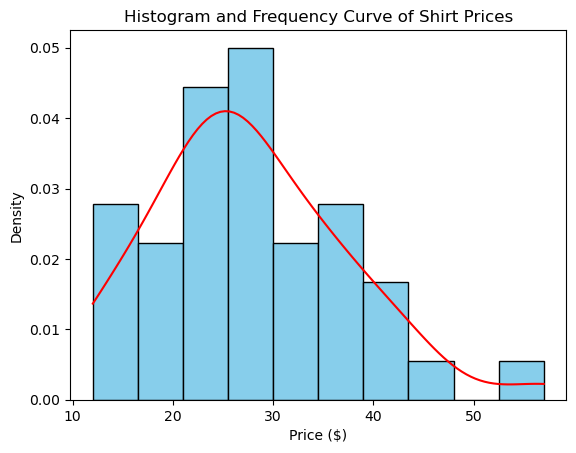

In [22]:
plt.hist(price_data, bins=10, color='skyblue', edgecolor='black', density=True,label='Histogram')

# Creating frequency curve (density plot)
density = stats.gaussian_kde(price_data)
prices = np.linspace(min(price_data), max(price_data), 100)
plt.plot(prices, density(prices), color='red', label='Frequency Curve')

plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.title('Histogram and Frequency Curve of Shirt Prices')

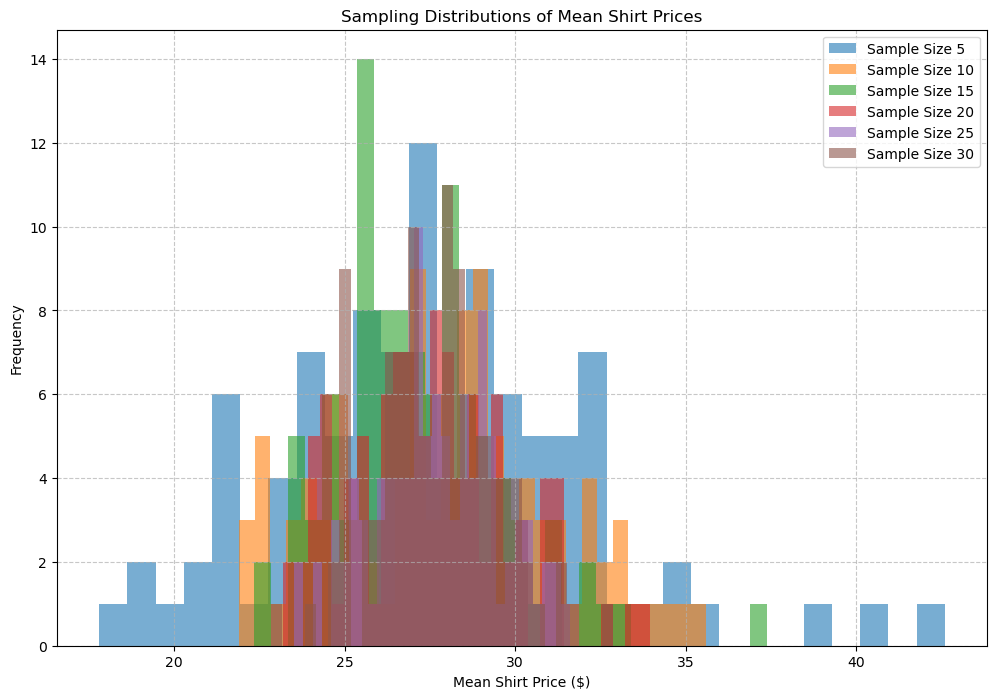

In [23]:
num_samples = 100

# Sample sizes to compare
sample_sizes = [5, 10, 15, 20, 25, 30]

# Initialize dictionary to store sampling distributions
sampling_distributions = {}

# Generate sampling distributions for each sample size
for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(price_data, size=size, replace=True)
        means.append(np.mean(sample))
    sampling_distributions[size] = means

# Plotting sampling distributions
plt.figure(figsize=(12, 8))
for size, means in sampling_distributions.items():
    plt.hist(means, bins=30, alpha=0.6, label=f'Sample Size {size}')

plt.xlabel('Mean Shirt Price ($)')
plt.ylabel('Frequency')
plt.title('Sampling Distributions of Mean Shirt Prices')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)

In [24]:
from math import comb

# Shirt prices data
shirt_prices = [23, 30, 20, 27, 44, 26, 35, 20, 29, 29, 25, 15, 18, 27, 19, 22, 12, 26, 34, 15, 27, 35, 26, 43, 35, 14, 24, 12, 23, 31, 40, 35, 38, 57, 22, 42, 24, 21, 27, 33]

# Convert the list to a DataFrame
df = pd.DataFrame(shirt_prices, columns=['price'])

# Number of shirts costing more than 25 dollars
num_shirts_above_25 = len(df[df['price'] > 25])

# Total number of shirts
total_shirts = len(df)

# Probability that a shirt costs above 25 dollars
p = num_shirts_above_25 / total_shirts

# Number of shirts in the random sample
n = 10

# Number of shirts costing more than 25 dollars in the random sample
k = 7

# Calculate the probability
probability = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f"The probability that out of a random sample of {n} shirts, 7 are costing more than 25 dollars is: {probability:.4f}")


The probability that out of a random sample of 10 shirts, 7 are costing more than 25 dollars is: 0.1914


In [25]:
from scipy.stats import norm

# Given data
p = 0.60  # Probability that a shirt costs less than 25 dollars
n = 10    # Number of shirts in the sample
k = 7     # Number of shirts costing less than 25 dollars in the sample

# Mean and standard deviation of the binomial distribution
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Apply continuity correction
x_lower = k - 0.5
x_upper = k + 0.5

# Use the normal distribution to calculate the probability
probability = norm.cdf(x_upper, loc=mu, scale=sigma) - norm.cdf(x_lower, loc=mu, scale=sigma)
print(f"The probability that in a random sample of {n} shirts, 7 of them will cost less than 25 dollars is: {probability:.4f}")

The probability that in a random sample of 10 shirts, 7 of them will cost less than 25 dollars is: 0.2070


In [26]:
from scipy.stats import norm

# Given data
p = 0.60  # Probability that a shirt costs less than 25 dollars
n = 10    # Number of shirts in the sample
k = 7     # Number of shirts costing less than 25 dollars in the sample

# Mean and standard deviation of the binomial distribution
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Apply continuity correction
x_lower = k - 0.5
x_upper = k + 0.5

# Use the normal distribution to calculate the probability
probability = norm.cdf(x_upper, loc=mu, scale=sigma) - norm.cdf(x_lower, loc=mu, scale=sigma)
print(f"The probability that in a random sample of {n} shirts, 7 of them will cost less than 25 dollars is: {probability:.4f}")


The probability that in a random sample of 10 shirts, 7 of them will cost less than 25 dollars is: 0.2070


In [27]:
from scipy.stats import t

# Shirt prices data
shirt_prices = [23, 30, 20, 27, 44, 26, 35, 20, 29, 29, 25, 15, 18, 27, 19, 22, 12, 26, 34, 15, 27, 35, 26, 43, 35, 14, 24, 12, 23, 31, 40, 35, 38, 57, 22, 42, 24, 21, 27, 33]

# Sample statistics
sample_mean = np.mean(shirt_prices)
sample_std = np.std(shirt_prices, ddof=1)  # Using Bessel's correction for sample standard deviation
n = len(shirt_prices)

# Degrees of freedom
df = n - 1

# Calculate the critical value
alpha = 0.05  # 95% confidence level
t_critical = t.ppf(1 - alpha/2, df)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"The 95% confidence interval for the true price of a shirt is: {confidence_interval}")


The 95% confidence interval for the true price of a shirt is: (24.547461337585172, 30.702538662414828)


In [28]:
# Given data
p = 0.60  # Estimated proportion of shirts with price greater than 25 dollars
E = 0.02  # Margin of error
Z = norm.ppf(0.975)  # Z-score for 95% confidence level

# Calculate the minimum sample size
n = (Z**2 * p * (1-p)) / (E**2)
n = int(round(n))  # Round up to the nearest integer
print(f"The minimum sample size necessary is: {n}")

The minimum sample size necessary is: 2305


In [29]:
# Given data
p = 0.60  # Estimated proportion of shirts with price greater than 25 dollars
E = 0.05  # Margin of error
Z = norm.ppf(0.95 + (1 - 0.95) / 2)  # Z-score for 90% confidence level

# Calculate the minimum sample size
n = (Z**2 * p * (1-p)) / (E**2)
n = int(round(n))  # Round up to the nearest integer
print(f"The minimum sample size necessary is: {n}")

The minimum sample size necessary is: 369


In [30]:
p_claimed = 0.80  # Claimed proportion of shirts with price > 25 dollars
n = 30  # Sample size
x = 23  # Number of shirts with price > 25 dollars in the sample
alpha = 0.05  # Significance level

# Calculate the sample proportion
p_sample = x / n

# Calculate the standard error
se = np.sqrt((p_claimed * (1 - p_claimed)) / n)

# Calculate the z-score
z = (p_sample - p_claimed) / se

# Calculate the critical value for a one-tailed test
critical_value = stats.norm.ppf(alpha)

# Perform the hypothesis test
if z < critical_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that the true proportion is less than 0.80.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion is less than 0.80.")

Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion is less than 0.80.


In [31]:
# Given data
mu_NuCloth = 36
mu_Supermarket = 34
std_NuCloth = 7.6
std_Supermarket = 5.8
n_NuCloth = 100
n_Supermarket = 100

# Calculate the pooled standard deviation
s_pooled = np.sqrt(((n_NuCloth - 1) * std_NuCloth**2 + (n_Supermarket - 1) * std_Supermarket**2) / (n_NuCloth + n_Supermarket - 2))

# Calculate the t-statistic
t = (mu_NuCloth - mu_Supermarket) / (s_pooled * np.sqrt(1/n_NuCloth + 1/n_Supermarket))

# Calculate the p-value
p_value = 1 - stats.t.cdf(t, n_NuCloth + n_Supermarket - 2)

print(f"t-statistic: {t:.4f}")
print(f"P-value: {p_value:.4f}")

t-statistic: 2.0920
P-value: 0.0189
